In [1]:
from importlib import reload as rel
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

import spectral_intensity as si
import v_x_interp as vx


plt.style.use('huntstone')
me      = const.physical_constants['electron mass energy equivalent in MeV'][0]*(1e6)
beamE   = 10e9 # beam energy in eV
gb0     = beamE/me # reltivistic Lorentz factor (centroid value)
beta    = (1/gb0**2) -1

In [2]:
# Load initial beam
x_init = np.load("x_init.npy")
y_init = np.load("y_init.npy")

# Calculate plasma parameters
ni    = 0.34e17 # plasma density (per cc)
ni_m  = ni * 1e6 # plasma density in m^-3 
e     = const.e # Electron charge C
m_e   = const.m_e # Electron mass kg
eps0  = const.epsilon_0
wpe   = np.sqrt(ni_m * e**2 / (eps0 * m_e))
ws    = wpe / np.sqrt(gb0)

# Compute time, spatial, and velocity arrays
L_plasma = 0.4 # m
t_prop   = L_plasma / const.c
N        = 100
t_arr    = np.linspace(0, t_prop, N)

x0_arr    = np.zeros((len(t_arr))) + const.c * t_arr
x1_arr    = np.zeros((len(x_init), len(t_arr)))
x2_arr    = np.zeros((len(y_init), len(t_arr)))
x3_arr    = np.zeros(len(t_arr)) + beta * const.c * t_arr;

#v0_arr = np.zeros(len(t_arr)) + gb0 * const.c
v1_arr   = np.zeros((len(x_init), len(t_arr)))
v2_arr   = np.zeros((len(y_init), len(t_arr)))
v3_arr   = np.zeros((len(t_arr))) + const.c
for i in range(len(t_arr)):
    x1_arr[:, i] = x_init * np.cos(ws * t_arr[i])
    x2_arr[:, i] = x_init * np.cos(ws * t_arr[i])
    
    v1_arr[:, i] = -x_init * ws * np.sin(ws * t_arr[i])
    v2_arr[:, i] = -y_init * ws * np.sin(ws * t_arr[i])

In [3]:
si = rel(si)
vx = rel(vx)

In [4]:
tau_arr = t_arr / gb0 # proper time array
tau_int = np.linspace(tau_arr[0], tau_arr[-1], 1000) # interpolation array
v1_arr = gb0 * v1_arr
v2_arr = gb0 * v2_arr
v3_arr = gb0 * v3_arr

In [5]:
x_arr = (x0_arr, x1_arr[0,:], x2_arr[0,:], x3_arr)
v_arr = (v1_arr[0,:], v2_arr[0,:], v3_arr)

In [6]:
x0n, x1n, x2n, v1n, x_int, v_int = si.get_coeffs(x_arr, v_arr, tau_arr, tau_int)

In [7]:
dtau = tau_arr[1] - tau_arr[0]

In [8]:
omega = 1e13
sx    = 0;
sy    = 2e-2
sz    = 10
mag   = np.sqrt(sx**2 + sy**2 + sz**2)
s_hat = np.array([1, sx / mag, sy / mag, sz / mag])
kappa = omega / const.c * s_hat
chi_1n = kappa[0] * x1n[0] - kappa[1] * x1n[1] - kappa[2] * x1n[2] - kappa[3] * x1n[3]  
chi_2n = kappa[0] * x2n[0] - kappa[1] * x2n[1] - kappa[2] * x2n[2] - kappa[3] * x2n[3]  

In [15]:
x2n[3]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.08999534e+12, -1.27619916e+13,  5.67199627e+12,  0.00000000e+00,
        0.00000000e+00,  1.41799907e+13, -1.41799907e+13, -9.92599347e+12,
        1.41799907e+13, -9.92599347e+12,  1.55979897e+13, -1.98519869e+13,
        2.83599813e+13, -3.82859748e+13,  3.82859748e+13, -8.50799440e+12,
       -3.97039739e+13,  5.81379618e+13, -3.82859748e+13,  0.00000000e+00,
        0.00000000e+00,  2.83599813e+13, -1.84339879e+13, -9.92599347e+12,
        2.83599813e+13, -1.84339879e+13, -1.98519869e+13,  1.98519869e+13,
        1.84339879e+13,  0.00000000e+00, -1.84339879e+13, -3.97039739e+13,
        7.79899487e+13, -3.82859748e+13, -3.97039739e+13,  9.78419356e+13,
       -9.78419356e+13,  1.98519869e+13,  3.82859748e+13,  1.98519869e+13,
       -7.79899487e+13,  5.81379618e+13,  0.00000000e+00, -5.81379618e+13,
        5.81379618e+13, -5.81379618e+13,  7.79899487e+13, -3.82859748e+13,
       -3.97039739e+13,  

In [48]:
phi_p = (dtau**2 / 4) * chi_2n + (dtau / 2) * chi_1n
phi_m = (dtau**2 / 4) * chi_2n + (dtau / 2) * chi_1n

In [54]:
psi_m = np.zeros((len(v_arr), len(tau_arr)))
for i in range(len(v_arr)):
    psi_m[i, :] = np.sqrt(2 * np.pi / chi_2n) * (2 * chi_2n * v_arr[i] - chi_1n * v1n[i]) \
                          * np.sin(chi_2n**2 / (4 * chi_1n))

/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [67]:
np.sqrt(2 * np.pi / chi_2n)

/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/keenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.73926447e-13, 1.13248087e-13, 1.40147118e-13,            nan,
                  nan,            nan, 2.79463034e-13, 1.17592170e-13,
       1.23961240e-13,            nan,            nan,            nan,
                  nan, 1.27599812e-13, 1.15840167e-13, 2.30410612e-13,
                  nan,            nan,            nan, 1.47336752e-13,
       1.12822210e-13, 1.61080576e-13,            nan,            nan,
                  nan, 1.91137241e-13, 1.14031215e-13, 1.34292724e-13,
                  nan,            nan,            nan, 3.86517313e-13,
       1.19805148e-13, 1.20968399e-13, 5.04813756e-13,            nan,
                  nan,            nan, 1.32009370e-13, 1.14505283e-13,
       2.00995276e-13,            nan,            nan,            nan,
       1.56295879e-13, 1.12744298e-13, 1.51122063e-13,            nan,
                  nan,            nan, 2.15568731e-13, 1.15189070e-13,
       1.29482639e-13,            nan,            nan,            nan,
      

In [71]:
x1n[1]

array([ 4.22819473e+09,  6.27359420e+08, -3.55256895e+09, -4.45324791e+09,
       -1.24329292e+09,  3.11430132e+09,  4.59719534e+09,  1.83658267e+09,
       -2.61931381e+09, -4.65741535e+09, -2.39642327e+09,  2.07662147e+09,
        4.63281116e+09,  2.91261848e+09, -1.49610820e+09, -4.52383088e+09,
       -3.37576699e+09,  8.88346739e+08,  4.33245935e+09,  3.77743360e+09,
       -2.64406068e+08, -4.06218195e+09, -4.11030288e+09, -3.64350156e+08,
        3.71792117e+09,  4.36831237e+09,  9.86470573e+08, -3.30594695e+09,
       -4.54676302e+09, -1.59062468e+09,  2.83376244e+09,  4.64240475e+09,
        2.16580919e+09, -2.30996742e+09, -4.65349567e+09, -2.70154842e+09,
        1.74410161e+09,  4.57983379e+09,  3.18808511e+09, -1.14647097e+09,
       -4.42276068e+09, -3.61655811e+09,  5.27959970e+08,  4.18513707e+09,
        3.97916375e+09,  1.00166611e+08, -3.87129075e+09, -4.26929800e+09,
       -7.26468887e+08,  3.48693769e+09,  4.48167673e+09,  1.33954019e+09,
       -3.03907802e+09, -

In [59]:
chi_1n[np.isnan(psi_m[0,:])]

array([6.88477194e+11, 4.74332475e+11, 1.83625660e+11, 7.02097751e+11,
       5.51260898e+11, 2.52852071e+11, 8.23217914e+10, 6.16595547e+11,
       3.32125069e+11, 1.02359067e+11, 6.65598409e+11, 4.15695843e+11,
       1.43356559e+11, 6.94715837e+11, 4.97503910e+11, 2.02341163e+11,
       5.71616616e+11, 2.75035363e+11, 8.58560539e+10, 6.32659370e+11,
       3.56167438e+11, 1.12187332e+11, 6.76205401e+11, 4.39853756e+11,
       1.58766088e+11, 6.99096788e+11, 5.20025455e+11, 2.22214469e+11,
       5.90868549e+11, 2.97931252e+11, 9.12615219e+10, 6.47245557e+11,
       3.80425518e+11, 1.23725538e+11, 6.85068064e+11, 4.63714852e+11,
       1.75600292e+11, 7.01593214e+11, 5.41759179e+11, 2.43123868e+11,
       8.13468608e+10, 6.08898791e+11, 3.21399514e+11, 9.85050904e+10,
       6.60264777e+11, 4.04750744e+11, 1.36903023e+11, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

IndexError: tuple index out of range

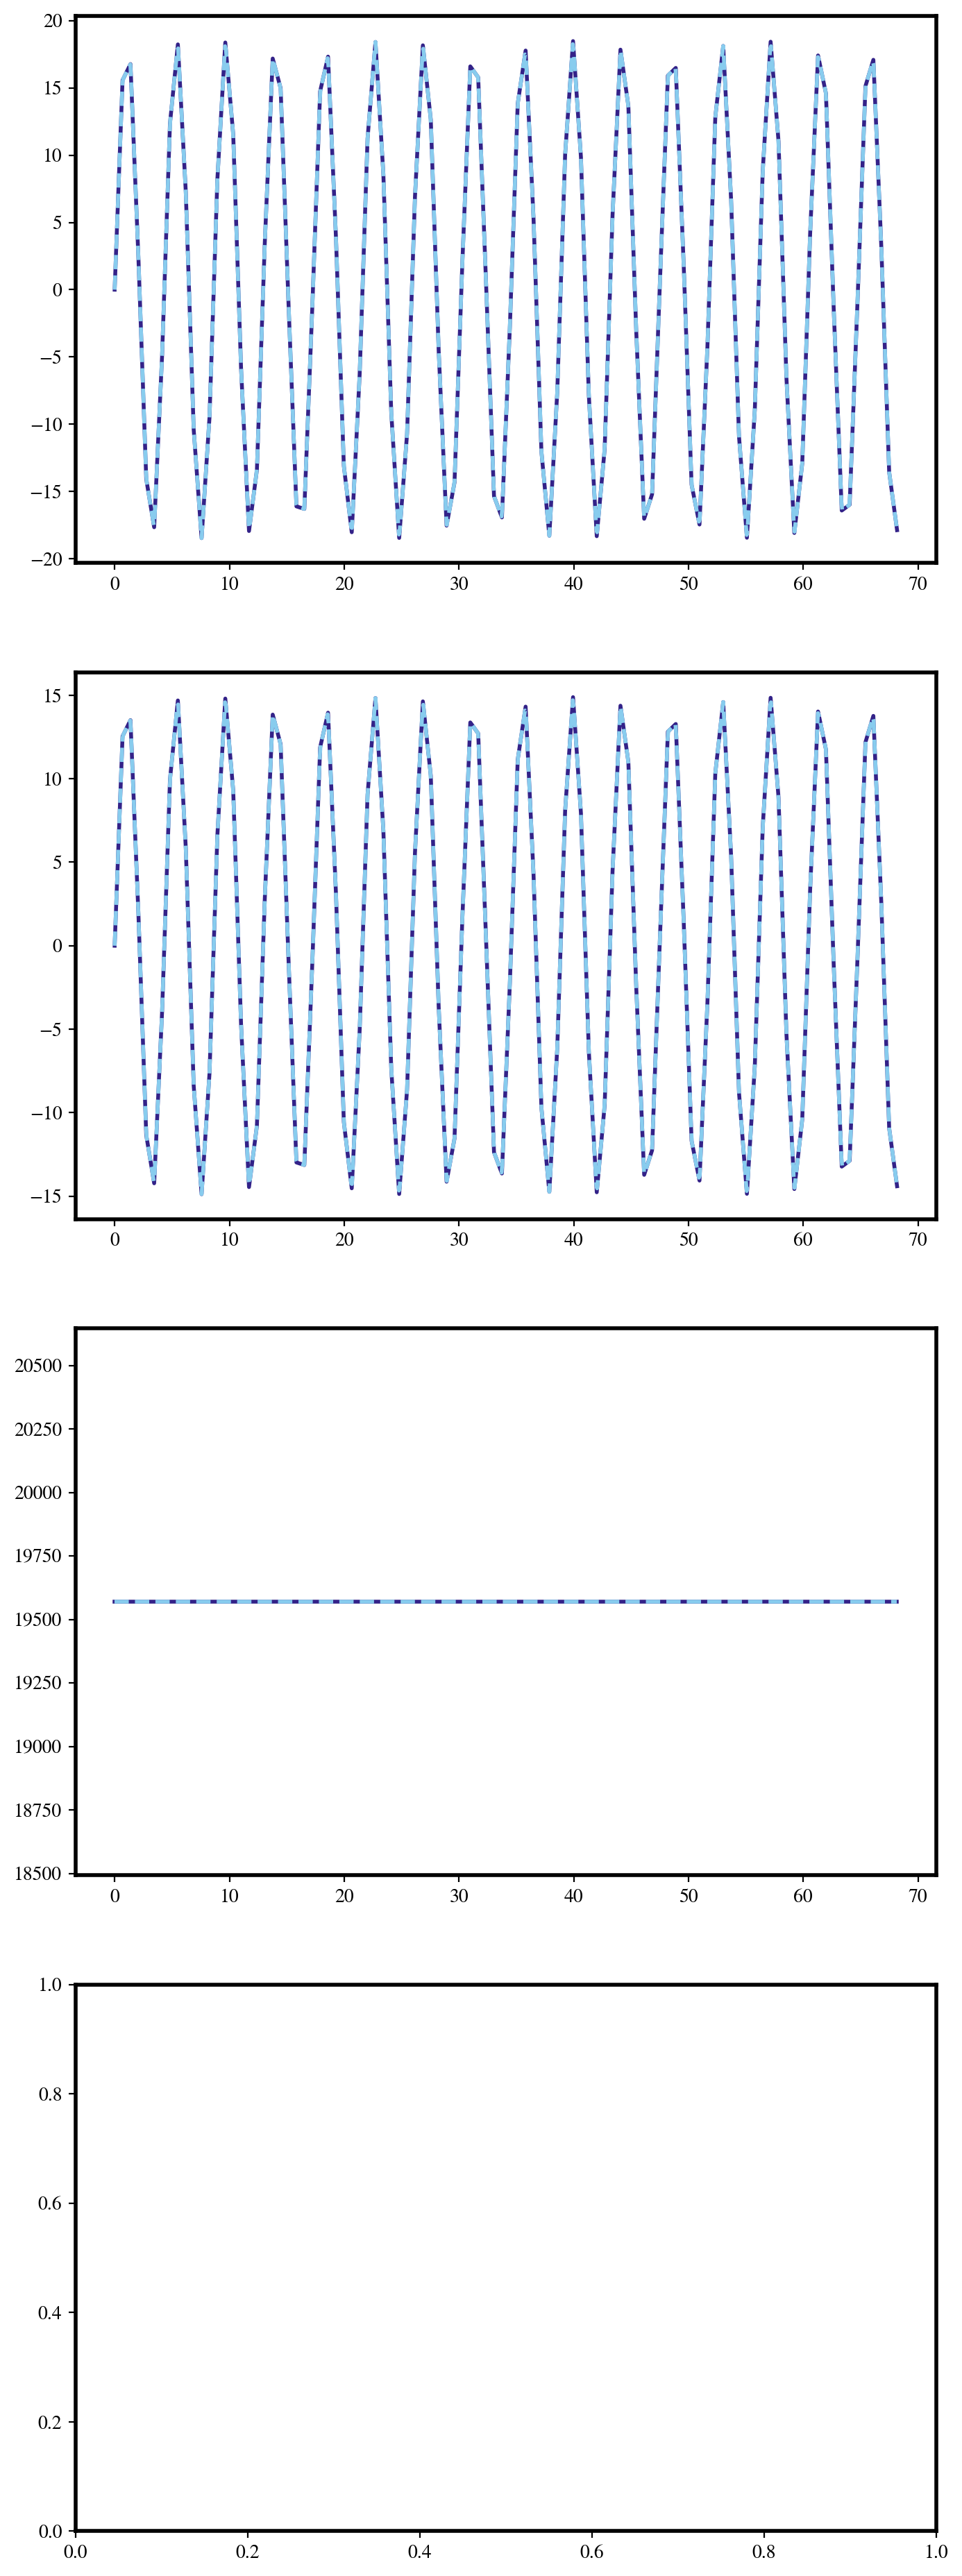

In [65]:
# Plot all velocity
if True:
    fig = plt.figure(figsize = (8, 24), dpi = 200)
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    ax1.plot(tau_arr * 1e15, v_arr[0] / const.c, label = r'$v^0 /c$')
    ax1.plot(tau_int * 1e15, v_int[0] / const.c, '--', label = 'Interpolation')
    ax2.plot(tau_arr * 1e15, v_arr[1] / const.c, label = r'$v^1 / c$')
    ax2.plot(tau_int * 1e15, v_int[1] / const.c, '--', label = 'Interpolation')
    ax3.plot(tau_arr * 1e15, v_arr[2] / const.c, label = r'$v^2 / c$')
    ax3.plot(tau_int * 1e15, v_int[2] / const.c, '--', label = 'Interpolation')
    ax4.plot(tau_arr * 1e15, v_arr[3] / const.c, label = r'$v^3$')
    ax4.plot(tau_int * 1e15, v_int[3] / const.c, '--', label = 'Interpolation')


    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel(r'$\tau$ [fs]')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    ax3.legend(loc = 'upper right')
    ax4.legend(loc = 'upper right')
    plt.subplots_adjust(hspace = 0)
    plt.show()

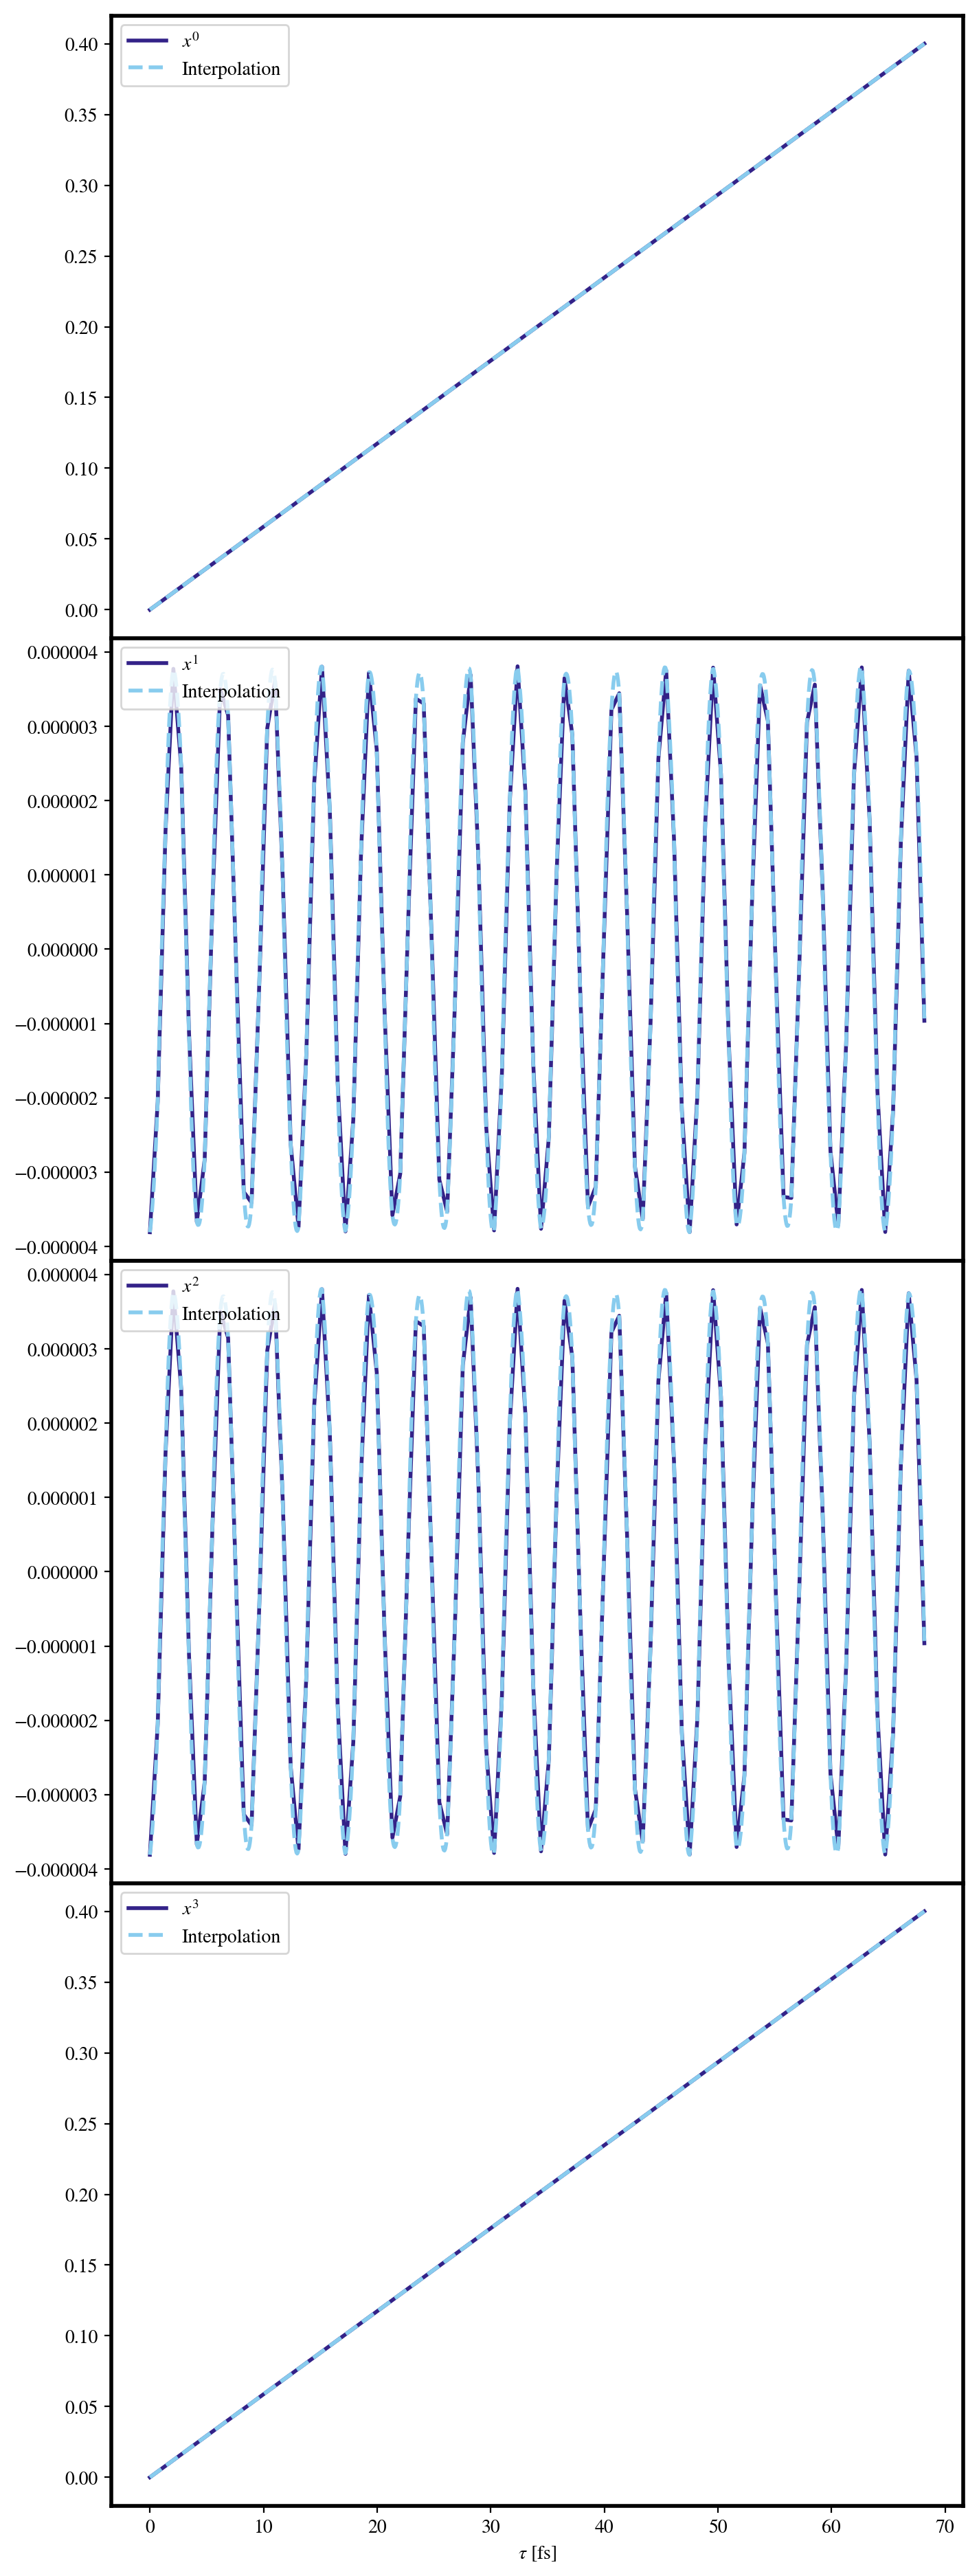

In [66]:
# Plot all  positions
if True:
    fig = plt.figure(figsize = (8, 24), dpi = 200)
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    
    ax1.plot(tau_arr * 1e15, x_arr[0], label = r'$x^0$')
    ax1.plot(tau_int * 1e15, x_int[0], '--', label = 'Interpolation')
    
    ax2.plot(tau_arr * 1e15, x_arr[1], label = r'$x^1$')
    ax2.plot(tau_int * 1e15, x_int[1], '--', label = 'Interpolation')
        
    ax3.plot(tau_arr * 1e15, x_arr[2], label = r'$x^2$')
    ax3.plot(tau_int * 1e15, x_int[2], '--', label = 'Interpolation')
    
    ax4.plot(tau_arr * 1e15, x_arr[3], label = r'$x^3$')
    ax4.plot(tau_int * 1e15, x_int[3], '--', label = 'Interpolation')

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel(r'$\tau$ [fs]')
    ax1.legend(loc = 'upper left')
    ax2.legend(loc = 'upper left')
    ax3.legend(loc = 'upper left')
    ax4.legend(loc = 'upper left')
    plt.subplots_adjust(hspace = 0)
    plt.show()